# Spanish_High_Speed_Rail_tickets_pricing-Renfe


In [1]:
# import modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('renfe.csv')

In [3]:
data.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


First step is to clean the dataset 

In [5]:
# remove the first "Unnamed: 0" column
data = data.iloc[:,1:]

In [6]:
# set "insert_date" ,"start_date" and "end_date" in datetime format
for col in ["insert_date" ,"start_date" , "end_date"]:
    data[col] = pd.to_datetime(data[col])

In [7]:
# set in datetime format and set it as index 
data.set_index('insert_date',inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2579771 entries, 2019-04-19 05:31:43 to 2019-04-19 05:31:38
Data columns (total 8 columns):
origin         object
destination    object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type     object
price          float64
train_class    object
fare           object
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 177.1+ MB


In [9]:
data.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
insert_date,,,,,,,,
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


Next step is to check if there is missing value

In [10]:
data.isnull().sum()

origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

Since there are too many missing values, instead of removing from the dataset, replacing missing values with mean values is more appropriate. 
<br>Since origin, destination and train_type have no missing values,and train_class and fare have fewer missing values than price, by using these information can help match with more accurate mean price.
<br>Missing values for train_class and fare are determined by mode of records with the same origin and destination

First step is to find the average price for each combinaiton
<br>This can be done by using groupby function

In [11]:
avg_price_by_type = data[~np.isnan(data['price'])].groupby(['origin','destination','train_type','train_class','fare']).agg({'price':np.mean})


In [12]:
avg_price_by_type.head()

price
origin    destination train_type train_class fare                
BARCELONA MADRID      AVE        Preferente  Flexible  183.374394
                                             Promo      98.457835
                                             Promo +   105.000000
                                 Turista     Flexible  112.274480
                                             Promo      77.878941

Second step is to fill the mean value back to the data table 

In [13]:
data.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
insert_date,,,,,,,,
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [14]:
data.reset_index(drop=False,inplace=True)
data.set_index(['origin','destination','train_type','train_class','fare'], inplace=True)

In [15]:
data.head()

insert_date  \
origin destination train_type train_class fare                        
MADRID SEVILLA     AV City    Turista     Promo 2019-04-19 05:31:43   
                   AVE        Turista     Promo 2019-04-19 05:31:43   
                                          Promo 2019-04-19 05:31:43   
                              Preferente  Promo 2019-04-19 05:31:43   
                   ALVIA      Turista     Promo 2019-04-19 05:31:43   

                                                         start_date  \
origin destination train_type train_class fare                        
MADRID SEVILLA     AV City    Turista     Promo 2019-05-29 06:20:00   
                   AVE        Turista     Promo 2019-05-29 07:00:00   
                                          Promo 2019-05-29 07:30:00   
                              Preferente  Promo 2019-05-29 08:00:00   
                   ALVIA      Turista     Promo 2019-05-29 08:30:00   

                                                           end_date  price  
origin destination train_type train_class fare                              
MADRID SEVILLA     AV City    Turista     Promo 2019-05-29 09:16:00  38.55  
                   AVE        Turista     Promo 2019-05-29 09:32:00  53.40  
                                          Promo 2019-05-29 09:51:00  47.30  
                              Preferente  Promo 2019-05-29 10:32:00  69.40  
                   ALVIA      Turista     Promo 2019-05-29 11:14:00    NaN

In [16]:
data['price'].fillna(avg_price_by_type['price'],inplace=True)

In [17]:
data.isnull().sum()

insert_date        0
start_date         0
end_date           0
price          53521
dtype: int64

Successfully reduce missing price records from over 310k to only 53k, only 2% of overall records left.
<br>To simplify, these records are deleted.

In [18]:
data.dropna(inplace=True)

In [19]:
data.reset_index( inplace=True)

In [20]:
data.isnull().sum()

origin         0
destination    0
train_type     0
train_class    0
fare           0
insert_date    0
start_date     0
end_date       0
price          0
dtype: int64

So by eliminating records with missing fare, those missing records from train_class and fare are also eliminated.
<br>Now we can explore the dataset

In [21]:
data.set_index('insert_date',inplace=True)

In [22]:
data.head()

,origin,destination,train_type,train_class,fare,start_date,end_date,price
insert_date,,,,,,,,
2019-04-19 05:31:43,MADRID,SEVILLA,AV City,Turista,Promo,2019-05-29 06:20:00,2019-05-29 09:16:00,38.55000
2019-04-19 05:31:43,MADRID,SEVILLA,AVE,Turista,Promo,2019-05-29 07:00:00,2019-05-29 09:32:00,53.40000
2019-04-19 05:31:43,MADRID,SEVILLA,AVE,Turista,Promo,2019-05-29 07:30:00,2019-05-29 09:51:00,47.30000
2019-04-19 05:31:43,MADRID,SEVILLA,AVE,Preferente,Promo,2019-05-29 08:00:00,2019-05-29 10:32:00,69.40000
2019-04-19 05:31:43,MADRID,SEVILLA,ALVIA,Turista,Promo,2019-05-29 08:30:00,2019-05-29 11:14:00,44.76199


In [23]:
data.pivot_table(index='origin',columns='destination',values='price',aggfunc='count')

destination,BARCELONA,MADRID,PONFERRADA,SEVILLA,VALENCIA
origin,,,,,
BARCELONA,NaN,401453.0,NaN,NaN,NaN
MADRID,476811.0,NaN,64330.0,405791.0,390257.0
PONFERRADA,NaN,78663.0,NaN,NaN,NaN
SEVILLA,NaN,389162.0,NaN,NaN,NaN
VALENCIA,NaN,319783.0,NaN,NaN,NaN


So Madrid is a terminal to connect all other four cities. 
<br>Also, the most crowded route is between madrid and barcelona, while between ponferrada and madrid is the least crowded 

Since madrid-barcelona is the most crowded route, below will study it more

In [24]:
data_b_m = data[(data['origin']=='BARCELONA')&(data['destination']=='MADRID')]
data_m_b = data[(data['origin']=='MADRID')&(data['destination']=='BARCELONA')]

In [25]:
len(set(data_b_m['start_date']))

2243

In [26]:
len(set(data_m_b['start_date']))

2230

So in total there are 2243 trains from Barcelona to Madrid and 2230 trains from Madrid to Barcelona 

## From Barcelona to Madrid

This part will study the relation between train_type, ticket fare and price 

In [27]:
data_b_m.groupby('train_type')['start_date'].count()

train_type
AVE          368298
AVE-TGV       15607
R. EXPRES     17548
Name: start_date, dtype: int64

In [28]:
data_b_m.groupby(['train_type'])['start_date'].nunique()

train_type
AVE          2075
AVE-TGV        84
R. EXPRES      84
Name: start_date, dtype: int64

In [29]:
data_b_m.groupby('train_type')['start_date'].count()/data_b_m.groupby(['train_type'])['start_date'].nunique()

train_type
AVE          177.493012
AVE-TGV      185.797619
R. EXPRES    208.904762
Name: start_date, dtype: float64

AVE is the most common train types among three. However, there are more average passengers in AVE-TGV and R. EXPRES than AVE. 
<br>Let's see if there are any difference between three

In [30]:
data_b_m['duration'] = data_b_m['end_date']-data_b_m['start_date']

C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
for train in ['AVE','AVE-TGV','R. EXPRES']:
    print('train type: ',train)
    print(data_b_m[data_b_m['train_type']==train].describe())
    print()

train type:  AVE
               price                duration
count  368298.000000                  368298
mean       86.831209  0 days 02:49:36.602316
std        20.726545  0 days 00:16:22.926300
min        38.800000         0 days 02:30:00
25%        75.400000         0 days 02:30:00
50%        85.100000         0 days 02:45:00
75%       100.400000         0 days 03:10:00
max       214.200000         0 days 03:10:00

train type:  AVE-TGV
              price         duration
count  15607.000000            15607
mean      85.988873  0 days 02:55:00
std       20.239718  0 days 00:00:00
min       32.300000  0 days 02:55:00
25%       75.400000  0 days 02:55:00
50%       83.500000  0 days 02:55:00
75%      102.150000  0 days 02:55:00
max      181.500000  0 days 02:55:00

train type:  R. EXPRES
          price         duration
count  17548.00            17548
mean      43.25  0 days 09:04:00
std        0.00  0 days 00:00:00
min       43.25  0 days 09:04:00
25%       43.25  0 days 09:04:00
5

The possible reason that R. EXPRES is popular is because of its cheap ticket price. It's only half other two train types.
<br>However, the duration requires 9 hours while other two only need around 3 hours.
<br>One thing is that std=0 for the price from R. EXPRES. Therefore we can assume that there is only one fare for R. RXPREs. 

In [32]:
set(data_b_m[data_b_m['train_type']=='R. EXPRES']['fare'])

{'Adulto ida'}

As expected. 

Then we can focus more about the remaining two train types. First is to see the price vs fare for each train type

In [33]:
data_b_m.groupby(['train_type','fare']).agg({'price':['count',np.mean,np.std]})

price                       
                        count        mean        std
train_type fare                                     
AVE        Flexible     51347  118.318214  20.755564
           Promo       316948   81.730000  15.580683
           Promo +          3  105.000000   0.000000
AVE-TGV    Flexible      2757  114.825444  20.280373
           Promo        12850   79.801914  13.878715
R. EXPRES  Adulto ida   17548   43.250000   0.000000

Promo is the cheapest type and Flexible is the most expensive one.
<br>This is expected as normally flexible ticket has less restricted condition on the usage of ticket or cancellation.
<br><br>Also around 80% of tickets are in Promo type in both AVE and AVE-TGV train types

Now let's move to the return trip

## From Madrid to Barcelona

This part will study about the number of journey and discover any pattern

In [34]:
print(data_m_b['start_date'].min())
print(data_m_b['end_date'].max())

2019-04-12 05:50:00
2019-07-07 23:55:00


In [35]:
data_m_b['start_day'] =data_m_b['start_date'].dt.day
data_m_b['start_mth'] =data_m_b['start_date'].dt.month
data_m_b['start_hour'] =data_m_b['start_date'].dt.hour
data_m_b['start_weekday'] =data_m_b['start_date'].dt.weekday 

data_m_b['end_day'] =data_m_b['end_date'].dt.day
data_m_b['end_mth'] =data_m_b['end_date'].dt.month
data_m_b['end_hour'] =data_m_b['end_date'].dt.hour
data_m_b['end_weekday'] =data_m_b['end_date'].dt.weekday 

C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [36]:
data_m_b.head()

,origin,destination,train_type,train_class,fare,start_date,end_date,price,start_day,start_mth,start_hour,start_weekday,end_day,end_mth,end_hour,end_weekday
insert_date,,,,,,,,,,,,,,,,
2019-04-19 06:00:47,MADRID,BARCELONA,AVE,Preferente,Promo,2019-04-27 06:20:00,2019-04-27 09:29:00,86.80,27,4,6,5,27,4,9,5
2019-04-19 06:00:47,MADRID,BARCELONA,AVE,Turista,Promo,2019-04-27 07:30:00,2019-04-27 10:40:00,75.40,27,4,7,5,27,4,10,5
2019-04-19 06:00:47,MADRID,BARCELONA,AVE,Turista,Flexible,2019-04-27 08:30:00,2019-04-27 11:15:00,107.70,27,4,8,5,27,4,11,5
2019-04-19 06:00:47,MADRID,BARCELONA,AVE,Turista,Flexible,2019-04-27 09:30:00,2019-04-27 12:34:00,107.70,27,4,9,5,27,4,12,5
2019-04-19 06:00:47,MADRID,BARCELONA,AVE,Turista Plus,Promo,2019-04-27 10:30:00,2019-04-27 13:15:00,80.15,27,4,10,5,27,4,13,5


First is to study the relation between ticket price and weekday of travelling 

In [37]:
for train in set(data_m_b['train_type']):
    print(data_m_b[data_m_b['train_type']==train].groupby(['train_type','train_class','fare','start_weekday']).agg({'price':['count',np.mean]}))

                                               price            
                                               count        mean
train_type train_class  fare     start_weekday                  
AVE-TGV    Preferente   Flexible 0                81  181.500000
                                 1                63  181.500000
                                 2               169  181.500000
                                 3                20  181.500000
                                 4               134  181.500000
                                 5                 4  181.500000
                                 6               211  181.500000
                        Promo    0               171  111.953139
                                 1               208  109.331617
                                 2               134  108.703869
                                 3                57  116.898338
                                 4                58  107.342241
                         

From the above results, there are some conclusions:
1. There are some combinations with fixed ticket prices, eg. train_type = R. EXPRES , (AVE-TGV,Preferente,Flexible), ...
2. Normally, tickets on Sunday are the most expensive within the week
3. R. EXPRES seems not in service on Sunday (only 3 records)
4. Ranking of ticket fare based on ticket price: Promo, Promo+, Flexible, Mesa

Next is to study the pattern of the travelling time 

In [38]:
data_m_b.groupby(['train_type','start_hour']).agg({'price':['count',np.mean]})

price           
                       count       mean
train_type start_hour                  
AVE        5            7892  58.309782
           6           27416  71.348430
           7           40242  86.414485
           8           38646  84.748119
           9           23606  89.187963
           10          19090  84.145071
           11          19112  93.537644
           12          19132  87.731220
           14          30424  87.703028
           15          30456  91.857992
           16          33926  96.555392
           17          34992  94.076632
           18          34058  99.077186
           19          35453  88.868748
           20          33421  81.567890
           21          15430  70.103902
AVE-TGV    13          19148  87.812527
R. EXPRES  7           14367  43.250000

Both AVE-TGV and R. EXPRES only have one timeslot from Madrid to Bacelona.
<br>There are many available options for AVE, and ticket prices are normally around 90 (except the first two and the lass sessions)
<br>Below will further study about records from AVE train

C:\Users\Yuasto\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=8.0, right=8.0
  ax.set_xlim(left, right)
C:\Users\Yuasto\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=8.0, right=8.0
  ax.set_xlim(left, right)


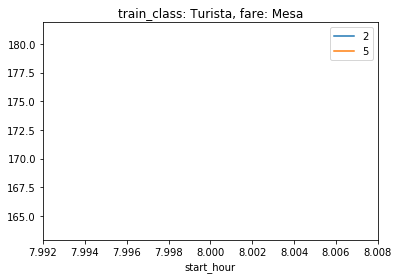

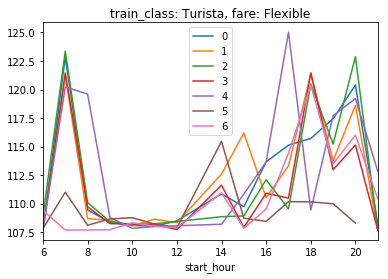

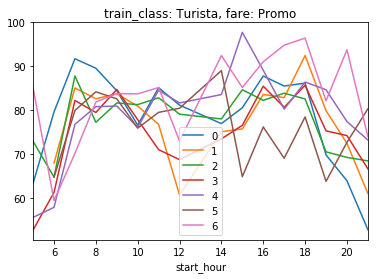

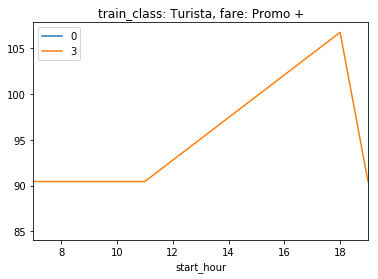

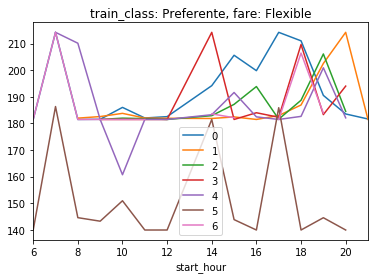

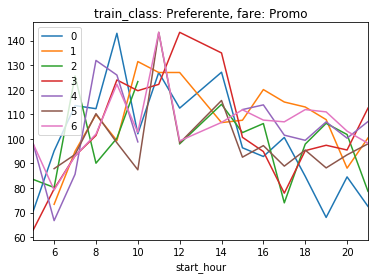

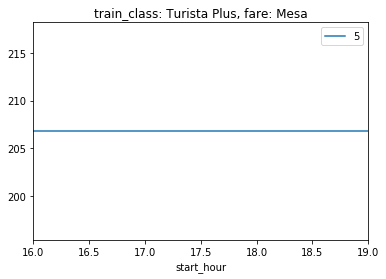

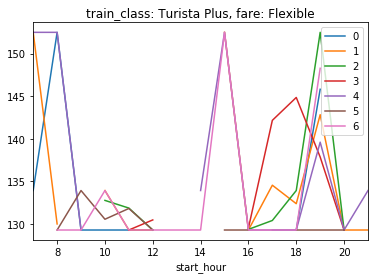

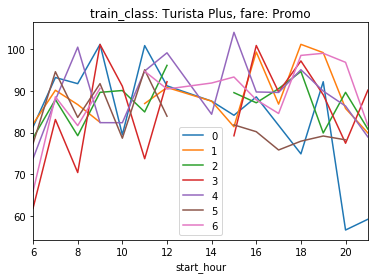

In [39]:
for train_class in set(data_m_b['train_class']):
    for fare in set(data_m_b['fare']):
        
        try:
            data_m_b[(data_m_b['train_type']=='AVE') & (data_m_b['train_class']==train_class) & (data_m_b['fare']==fare)]\
        .pivot_table(index='start_hour',columns='start_weekday',values='price',aggfunc=np.mean).plot()
            plt.title("train_class: {}, fare: {}".format(train_class,fare))
            plt.legend(loc=0)
            plt.show()
        except TypeError:
            continue
        print()

Obviously the prices are related to the leaving time.
<br>There are some times with higher ticket prices , eg: 7, 19 and 20 hours 